# Tugas Ho 2
**Nama**: Elsa Elisa Yohana Sianturi  
**NIM**: 122140135  

# No I

- **Durasi**: 135 (Second)
- **Sampling Rate**: 150 Hz.
- **Noise Level**: 0.<2 digit NIM terakhir> → 0.35.
- **Heart Rate**: 80 Beat Per Minute (BPM).
- **Random State**: Tanggal bulan tahun lahir Anda dengan format YYMMD. --> 031209 (09 Desember 2003)


### Membuat Sinyal PPG


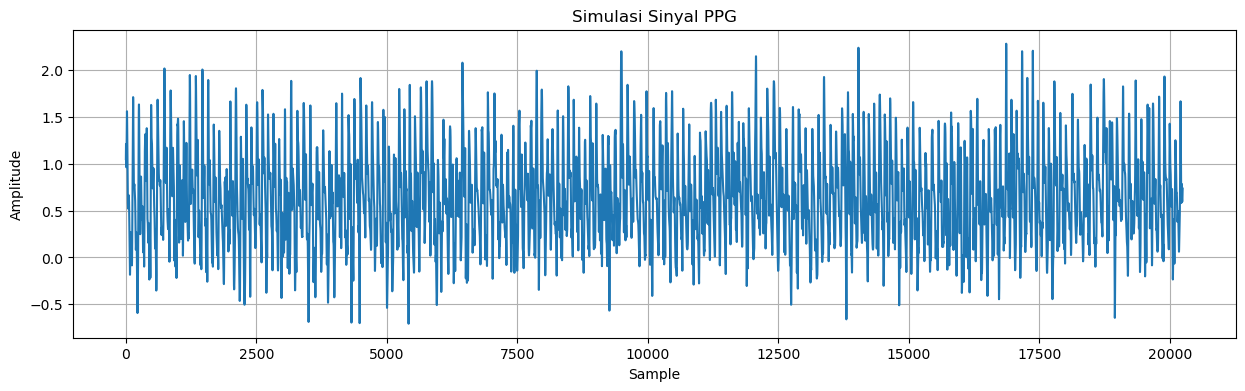

In [23]:
import neurokit2 as nk
import matplotlib.pyplot as plt

# Set parameter
duration = 135  #NIM terakhir 135 (122140135)
sampling_rate = 150  # in Hz
noise = 0.35  # 0.(2 digit nim terakhir dari nim) 0.35
heart_rate = 80  # in BPM
random_state = 31209  # menggunakan tanggal lahir, bulan, tahun lahir (yymmdd) --> 09 desember 2003 # (yymmdd) --> 031209

# Simulasi sinyal PPG
ppg_signal = nk.ppg_simulate(
    duration=duration,
    sampling_rate=sampling_rate,
    heart_rate=heart_rate,
    random_state=random_state
)

# Tambahkan noise ke sinyal
ppg_signal = nk.signal_distort(ppg_signal, noise_amplitude=noise)

# Plot hasil simulasi
plt.figure(figsize=(15, 4))
plt.plot(ppg_signal)
plt.title('Simulasi Sinyal PPG')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


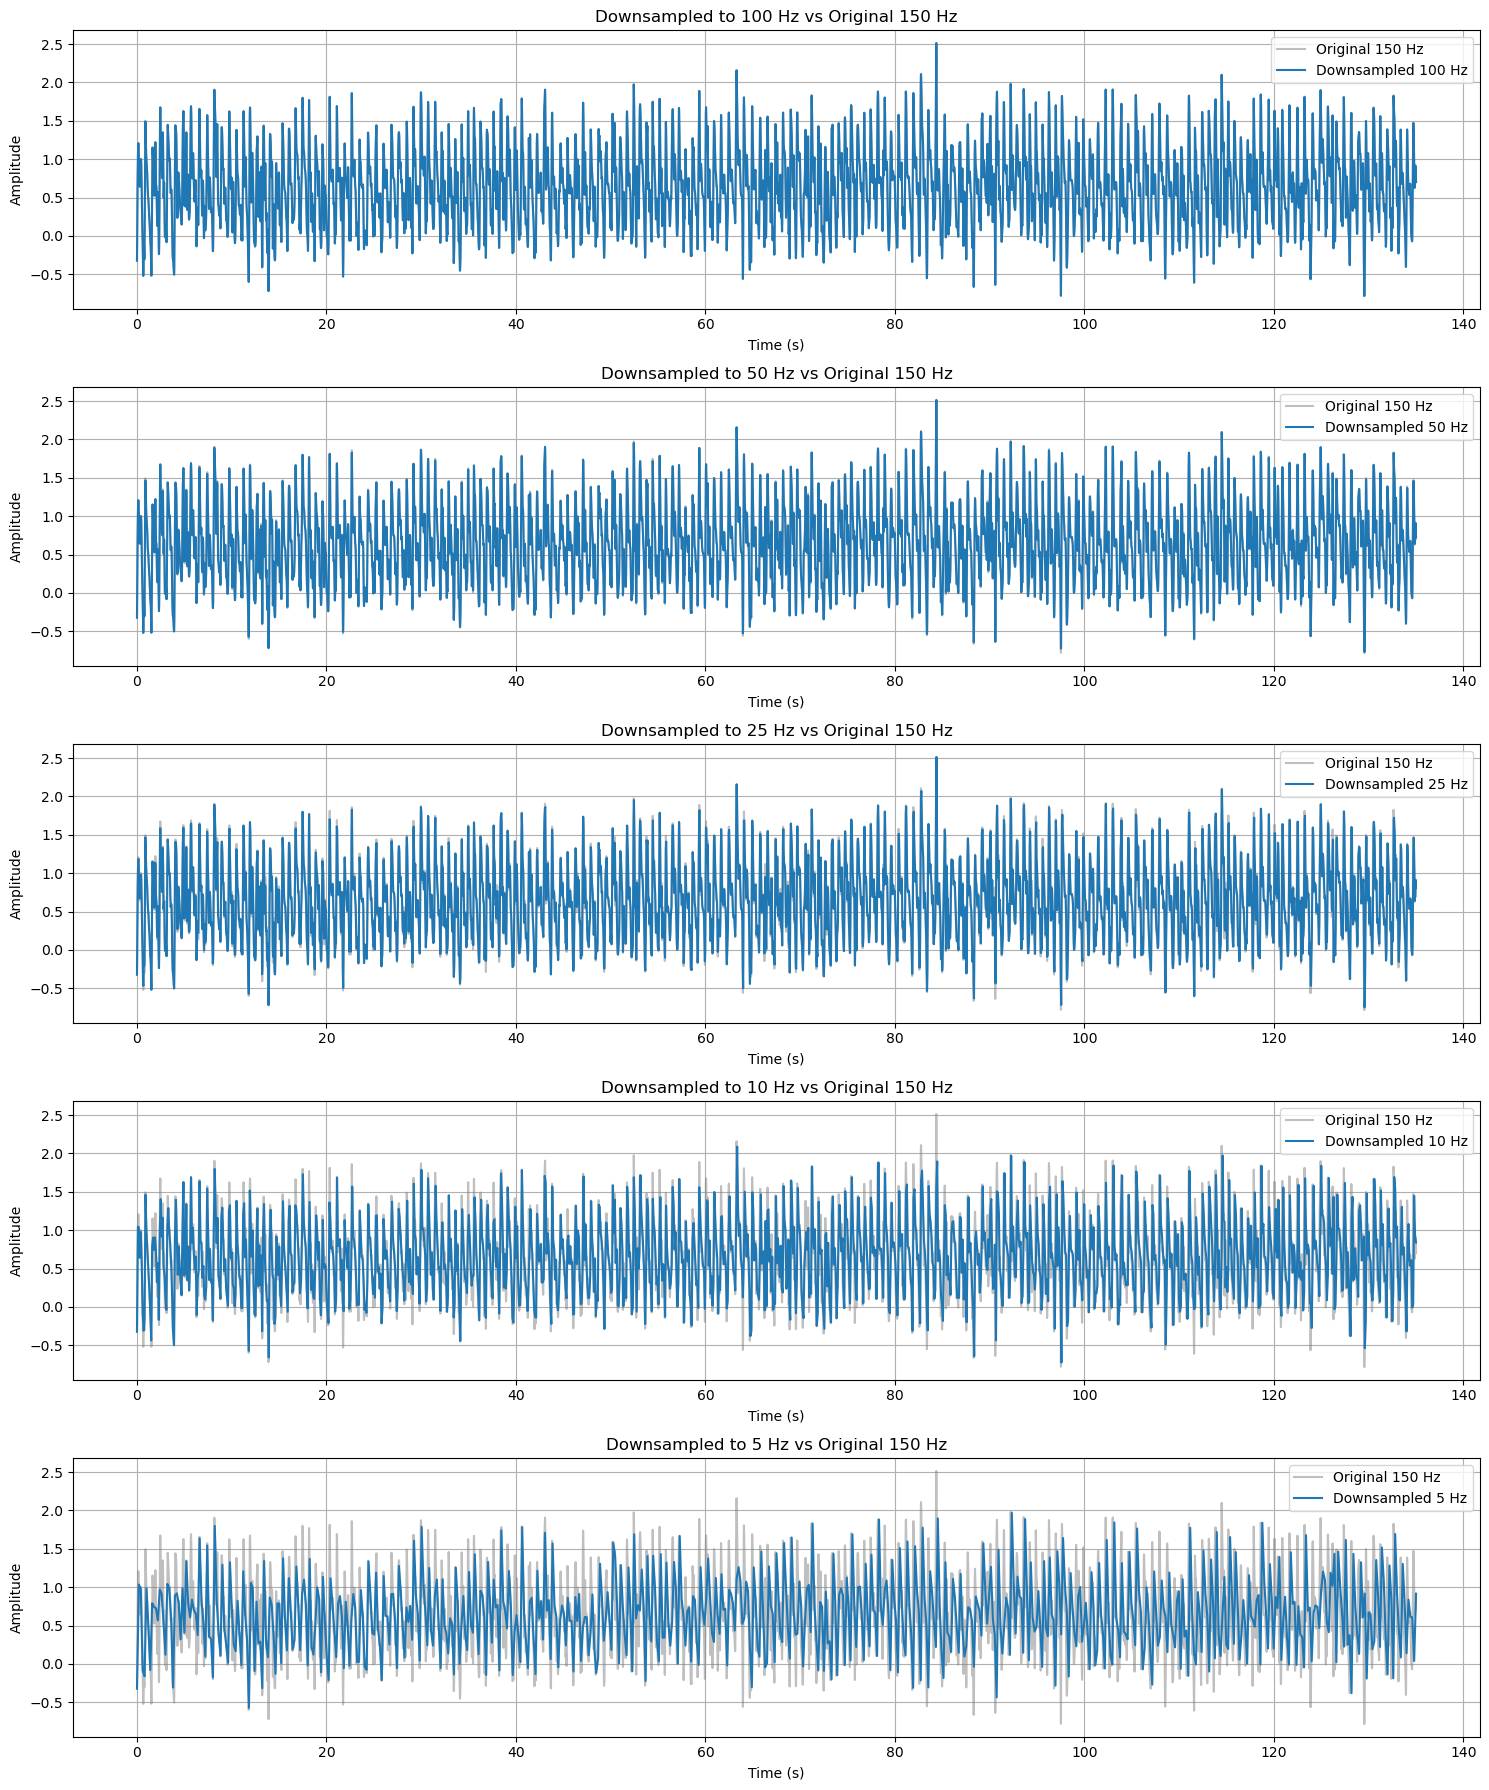

In [34]:
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt


# Set parameter
duration = 135  #NIM terakhir 135 (122140135)
sampling_rate = 150  # in Hz
noise = 0.35  # 0.(2 digit nim terakhir dari nim) 0.35
heart_rate = 80  # in BPM
random_state = 31209  # menggunakan tanggal lahir, bulan, tahun lahir (yymmdd) --> 09 desember 2003 # (yymmdd) --> 031209

# Simulasi sinyal PPG
ppg_signal = nk.ppg_simulate(
    duration=duration,
    sampling_rate=sampling_rate,
    heart_rate=heart_rate,
    random_state=random_state
)

# Tambahkan noise ke sinyal
ppg_signal = nk.signal_distort(ppg_signal, noise_amplitude=noise)

# Fungsi downsampling
def downsample(signal, original_fs, target_fs):
    factor = int(original_fs / target_fs)
    return signal[::factor]

# Daftar sampling rate target
target_fs_list = [100, 50, 25, 10, 5]

# Downsampling sinyal
ppg_downsampled = {}
time_downsampled = {}

# Vektor waktu asli
time_original = np.linspace(0, duration, len(ppg_signal))

for fs in target_fs_list:
    ppg_downsampled[fs] = downsample(ppg_signal, sampling_rate, fs)
    time_downsampled[fs] = np.linspace(0, duration, len(ppg_downsampled[fs]))

# Visualisasi
plt.figure(figsize=(15, 18))

# Plot sinyal original untuk referensi (di setiap plot)
for idx, fs in enumerate(target_fs_list, start=1):
    plt.subplot(len(target_fs_list), 1, idx)
    plt.plot(time_original, ppg_signal, label="Original 150 Hz", color='gray', alpha=0.5)  
    plt.plot(time_downsampled[fs], ppg_downsampled[fs], label=f"Downsampled {fs} Hz")
    plt.title(f"Downsampled to {fs} Hz vs Original 150 Hz")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


### Analisis Distorsi dan Aliasing pada Downsampling

Berdasarkan visualisasi sinyal hasil downsampling, berikut hasil analisis berdasarkan visualiasi sinyal hasil downsampling yang telah dilakukan:

1. **Distorsi Sinyal**:
    - Ketika frekuensi sampling diturunkan, jumlah sampel yang digunakan untuk merepresentasikan sinyal asli berkurang. Hal ini menyebabkan detail dari sinyal asli hilang, sehingga sinyal hasil downsampling menjadi kurang akurat.
    - Pada frekuensi sampling yang lebih tinggi yaitu 100 Hz, sinyal hasil downsampling masih cukup mirip dengan sinyal asli. Namun, pada fs yang lebih rendah yaitu 5 Hz, sinyal menjadi semakin kasar, kehilangan detail penting, dan bentuknya  menyimpang dari sinyal asli.

2. **Aliasing**:
    - Aliasing adalah fenomena di mana frekuensi tinggi dalam sinyal asli tidak dapat direpresentasikan dengan benar setelah downsampling, sehingga muncul sebagai frekuensi rendah yang tidak ada dalam sinyal asli.
    - Pada fs yang sangat rendah yaitu 5 Hz, sinyal hasil downsampling menunjukkan pola yang tidak sesuai dengan sinyal asli. Ini adalah bukti bahwa aliasing telah terjadi.
    - Aliasing terjadi karena frekuensi sampling yang  tidak memenuhi kriteria Nyquist, yaitu fs harus setidaknya dua kali lipat dari frekuensi tertinggi dalam sinyal asli. Jika fs terlalu rendah, informasi frekuensi tinggi "terlipat" menjadi frekuensi rendah, menyebabkan distorsi yang tidak dapat diperbaiki.

3. **Observasi Visualisasi sinyal hasil downsampling**:
    - Pada fs = 100 Hz, sinyal hasil downsampling masih cukup halus dan menyerupai sinyal asli.
    - Pada fs = 50 Hz, sinyal mulai kehilangan beberapa detail, tetapi masih dapat dikenali.
    - Pada fs = 25 Hz, sinyal mulai menunjukkan perubahan yang lebih signifikan, dengan detail yang semakin berkurang.
    - Pada fs = 10 Hz, sinyal menjadi sangat kasar, dan pola yang tidak ada dalam sinyal asli mulai muncul.
    - Pada fs = 5 Hz, sinyal menjadi sangat banyak berubah, dengan pola yang tidak sesuai dengan sinyal asli, menunjukkan adanya aliasing.

### Kesimpulan
Semakin rendah sampling frequency (fs), sinyal akan semakin terdistorsi karena kehilangan detail penting. Pada fs yang sangat rendah, aliasing terjadi, menyebabkan munculnya pola yang tidak ada dalam sinyal asli. Oleh karena itu, penting untuk memilih fs yang cukup tinggi untuk merepresentasikan sinyal asli dengan akurat dan menghindari aliasing.

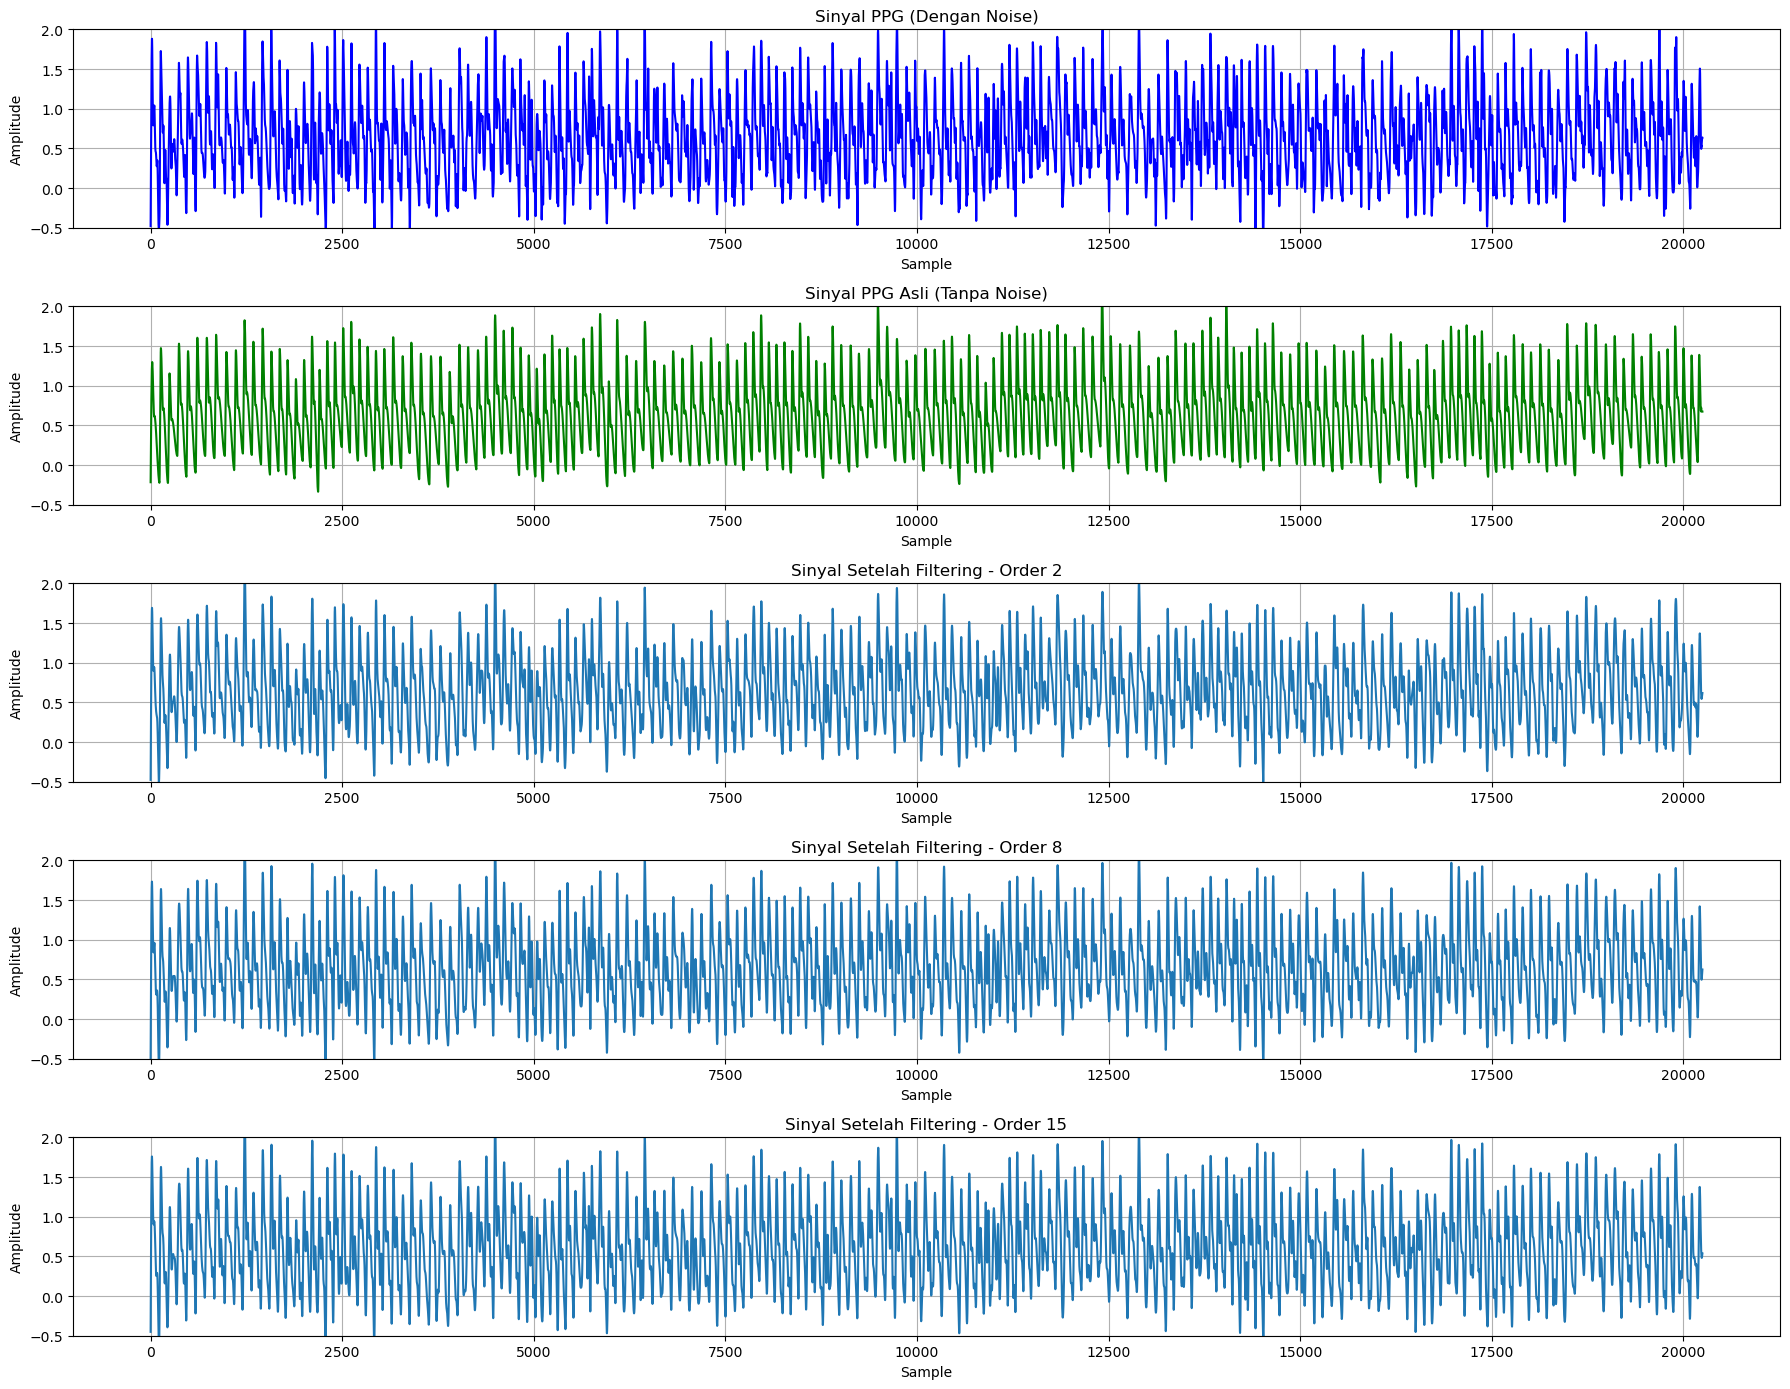

In [37]:
# --- 5. Parameter filter ---
orders = [2, 8, 15]  # Nilai order diubah menjadi 2, 8, dan 15

# --- 6. Plot semua ---
plt.figure(figsize=(18, 14))

# Plot sinyal noisy
plt.subplot(len(orders)+2, 1, 1)
plt.plot(ppg_signal_noisy, color='blue')
plt.title('Sinyal PPG (Dengan Noise)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.ylim(-0.5, 2)  # <--- set batas amplitudo
plt.grid(True)

# Plot sinyal original
plt.subplot(len(orders)+2, 1, 2)
plt.plot(ppg_signal_original, color='green')
plt.title('Sinyal PPG Asli (Tanpa Noise)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.ylim(-0.5, 2)  # <--- set batas amplitudo
plt.grid(True)

# Plot hasil filtering untuk tiap order
for idx, order in enumerate(orders, start=3):
    filtered_signal = butter_lowpass_filter(ppg_signal_noisy, cutoff=cutoff_freq, fs=sampling_rate, order=order)
    
    plt.subplot(len(orders)+2, 1, idx)
    plt.plot(filtered_signal)
    plt.title(f'Sinyal Setelah Filtering - Order {order}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.ylim(-0.5, 2)  # <--- set batas amplitudo
    plt.grid(True)

plt.tight_layout()
plt.show()


### Pengaruh Nilai **Order** terhadap Sinyal yang Dihasilkan
1. **Order Rendah**:
    - Filter dengan **order** rendah menghasilkan transisi yang lebih halus antara passband dan stopband.
    - Sinyal yang dihasilkan cenderung lebih halus, tetapi mungkin tidak sepenuhnya menghilangkan noise atau komponen frekuensi yang tidak diinginkan.
    - Pada visualisasi, sinyal hasil filtering dengan **order** rendah terlihat lebih "kabur" atau kurang tajam, seperti pada **order 2**.

2. **Order Tinggi**:
    - Filter dengan **order** tinggi menghasilkan transisi yang lebih tajam antara passband dan stopband.
    - Sinyal yang dihasilkan lebih bersih karena noise atau komponen frekuensi yang tidak diinginkan lebih efektif dihilangkan.
    - Namun, filter dengan **order** tinggi dapat menyebabkan overshoot atau distorsi pada sinyal, terutama di sekitar tepi transisi.
    - Pada visualisasi, sinyal hasil filtering dengan **order** tinggi terlihat lebih tajam dan mendekati bentuk sinyal asli, seperti pada **order 8** dan **order 15**, tetapi mungkin menunjukkan sedikit distorsi. Distorsi adalah perubahan yang tidak di  inginkan pada bentuk gelombang sinyal.

### Analisis Berdasarkan Visualisasi
- **Order 2**: Sinyal hasil filtering terlihat cukup halus, tetapi masih terdapat noise yang tersisa.
- **Order 8**: Sinyal terlihat sangat bersih dan mendekati bentuk sinyal asli, dengan noise yang lebih efektif dihilangkan. Namun, terdapat sedikit overshoot di beberapa bagian sinyal.
- **Order 15**: Sinyal terlihat sangat tajam dan mendekati bentuk sinyal asli, tetapi overshoot atau distorsi lebih jelas terlihat dibandingkan dengan **order 8**.

### Kesimpulan
- Nilai **order** memengaruhi seberapa tajam filter memisahkan frekuensi yang diinginkan dari frekuensi yang tidak diinginkan.
- **Order** yang lebih tinggi menghasilkan sinyal yang lebih bersih, tetapi dapat menyebabkan overshoot atau distorsi.
- Pemilihan nilai **order** harus mempertimbangkan kebutuhan aplikasi, seperti tingkat kebersihan sinyal yang diinginkan dan toleransi terhadap distorsi.


# No II Eksperimen dengan merancang filter band-pass menggunakan signal.butter. Pada sinyal respirasi (pernapasan). Generate sebuah signal dengan ketentuan:
- **Durasi**: 135 (dalam second)
- **Sampling Rate**: 150 Hz.
- **Noise Level**: 0.<2 digit NIM terakhir> → 0.35.
- **Heart Rate**: 80 Beat Per Minute (BPM).
- **Random State**: Tanggal bulan tahun lahir Anda dengan format YYMMD. --> 031209 (09 Desember 2003)


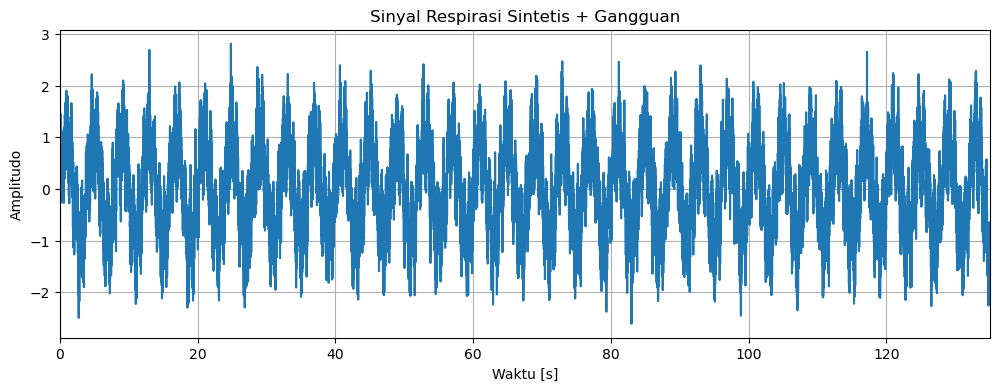

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, freqz

# Parameter
duration = 135  # detik
fs = 150        # sampling rate
t = np.linspace(0, duration, int(duration * fs), endpoint=False)
noise_level = 0.35
heart_rate_freq = 80 / 60  # BPM ke Hz (~1.33 Hz)

# Random seed
np.random.seed(31209)

# Membuat sinyal respirasi (frekuensi 0.25 Hz)
respiration_signal = np.sin(2 * np.pi * 0.25 * t)

# Menambahkan gangguan dari jantung
heart_signal = 0.5 * np.sin(2 * np.pi * heart_rate_freq * t)

# Noise acak
noise = noise_level * np.random.randn(len(t))

# Gabungkan semua
signal = respiration_signal + heart_signal + noise

# Plot sinyal
plt.figure(figsize=(12, 4))
plt.plot(t, signal)
plt.title('Sinyal Respirasi Sintetis + Gangguan')
plt.xlabel('Waktu [s]')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.xlim(0, 135)  
plt.show()


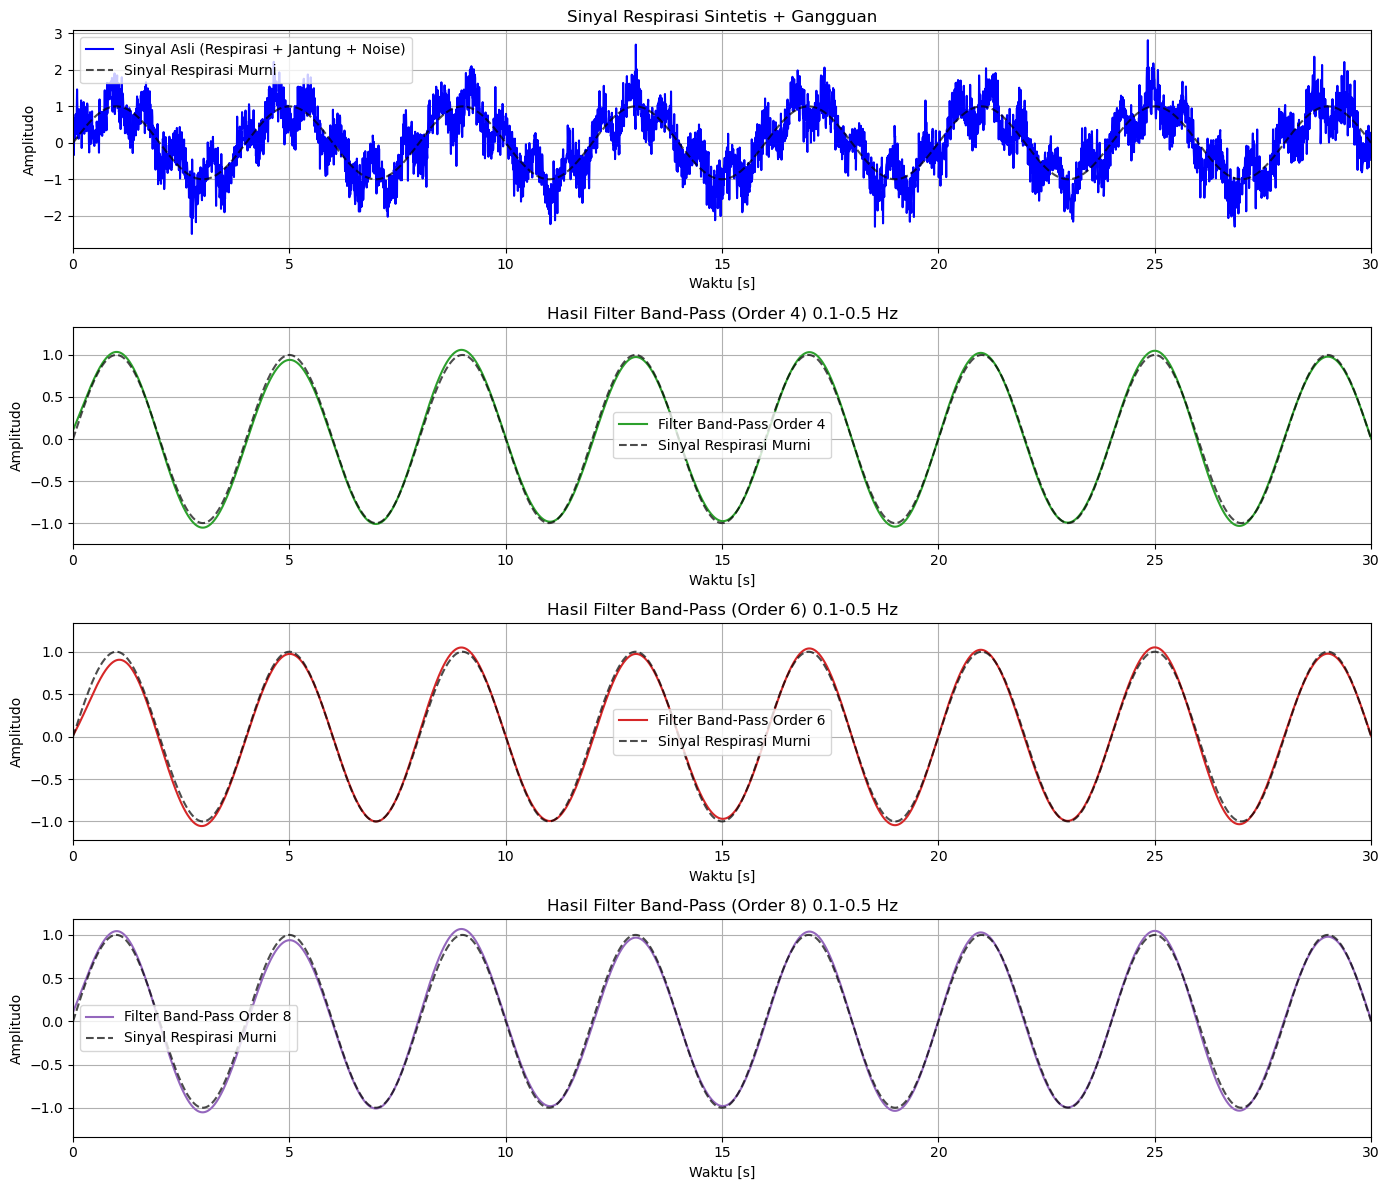

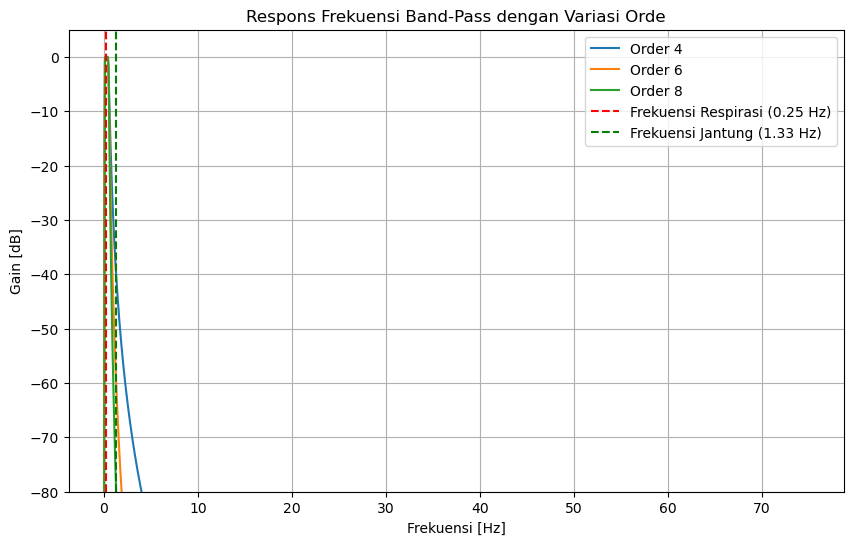

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, sosfiltfilt, sosfreqz

# 1. GENERATE SINYAL RESPIRASI + GANGGUAN

duration = 135  # detik
fs = 150        # sampling rate (Hz)
t = np.linspace(0, duration, int(duration * fs), endpoint=False)
noise_level = 0.35
heart_rate_freq = 80 / 60  # Konversi BPM ke Hz (~1.33 Hz)

np.random.seed(31209)

respiration_signal = np.sin(2 * np.pi * 0.25 * t)
heart_signal = 0.5 * np.sin(2 * np.pi * heart_rate_freq * t)
noise = noise_level * np.random.randn(len(t))
signal = respiration_signal + heart_signal + noise

# 2. DESAIN BAND-PASS FILTER (Dengan Variasi Order)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    sos = butter(order, [low, high], btype='band', output='sos')
    return sos

def apply_filter(signal, lowcut, highcut, fs, order=5):
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    filtered_signal = sosfiltfilt(sos, signal)
    return filtered_signal

# Parameter
cutoff = (0.1, 0.5)
orders = [4, 6, 8]  # Variasi order filter

# Simpan hasil filter untuk tiap order
filtered_signals = {}
for order in orders:
    filtered_signals[order] = apply_filter(signal, cutoff[0], cutoff[1], fs, order=order)

# 3. VISUALISASI HASIL

plt.figure(figsize=(14, 12))

# Subplot 1: Sinyal Asli
plt.subplot(len(orders)+1, 1, 1)
plt.plot(t, signal, label='Sinyal Asli (Respirasi + Jantung + Noise)', color='blue')
plt.plot(t, respiration_signal, '--', label='Sinyal Respirasi Murni', color='black', alpha=0.7)
plt.title('Sinyal Respirasi Sintetis + Gangguan')
plt.xlabel('Waktu [s]')
plt.ylabel('Amplitudo')
plt.legend()
plt.grid(True)
plt.xlim(0, 30)

# Subplot 2+: Filter hasil
for idx, order in enumerate(orders, start=2):
    plt.subplot(len(orders)+1, 1, idx)
    plt.plot(t, filtered_signals[order], label=f'Filter Band-Pass Order {order}', color='C'+str(idx))
    plt.plot(t, respiration_signal, '--', label='Sinyal Respirasi Murni', color='black', alpha=0.7)
    plt.title(f'Hasil Filter Band-Pass (Order {order}) 0.1-0.5 Hz')
    plt.xlabel('Waktu [s]')
    plt.ylabel('Amplitudo')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 30)

plt.tight_layout()

# 4. VISUALISASI RESPONS FREKUENSI FILTER

plt.figure(figsize=(10, 6))
for order in orders:
    sos = butter_bandpass(cutoff[0], cutoff[1], fs, order=order)
    w, h = sosfreqz(sos, worN=2000, fs=fs)
    plt.plot(w, 20 * np.log10(np.maximum(abs(h), 1e-5)), label=f'Order {order}')

plt.title('Respons Frekuensi Band-Pass dengan Variasi Orde')
plt.xlabel('Frekuensi [Hz]')
plt.ylabel('Gain [dB]')
plt.axvline(0.25, color='red', linestyle='--', label="Frekuensi Respirasi (0.25 Hz)")
plt.axvline(1.33, color='green', linestyle='--', label="Frekuensi Jantung (1.33 Hz)")
plt.legend()
plt.grid(True)
plt.ylim(-80, 5)
plt.show()


### Analisis Visualisasi Sinyal dengan Filtering Band-Pass (Cutoff 0.1 - 0.5 Hz)
1. Untuk mempermudah analisis, sinyal divisualisasikan hanya pada 30 detik pertama dari total durasi 135 detik. Hal ini dilakukan karena dalam durasi yang lebih pendek, bentuk sinyal menjadi lebih jelas terlihat, sehingga memudahkan pengamatan pola dan karakteristik sinyal respirasi.
2. **Alasan Pemilihan Frekuensi Cutoff**:
    - Frekuensi respirasi manusia umumnya berada dalam rentang 0.1 - 0.5 Hz, sehingga cutoff ini dipilih untuk memastikan bahwa sinyal respirasi dapat dipertahankan dengan baik.
    - Frekuensi di luar rentang ini, seperti noise  dan sinyal jantung yaitu 1.33 Hz, dapat dihilangkan untuk mendapatkan sinyal respirasi yang lebih bersih.

3. **Hasil Filtering**:
    - Sinyal hasil filtering menunjukkan bahwa komponen frekuensi respirasi berhasil dipertahankan, sementara noise dan gangguan dari sinyal jantung sebagian besar telah dihilangkan.
    - Pada visualisasi, sinyal yang dihasilkan lebih halus dan mendekati bentuk sinyal respirasi murni.

4. **Pengaruh Order Filter**:
    - **Order Rendah (4)**: Transisi antara passband dan stopband lebih halus, sehingga sinyal hasil filtering masih mengandung sedikit noise.
    - **Order Tinggi (6, 8)**: Transisi lebih tajam, menghasilkan sinyal yang lebih bersih dengan noise yang lebih sedikit. Namun, order yang terlalu tinggi dapat menyebabkan distorsi. Distorsi ini maksudnya menghasilkan perubahan bentuk sinyal yang tidak diinginkan.


### Kesimpulan
Filtering band-pass dengan cutoff 0.1 - 0.5 Hz efektif untuk mengekstraksi sinyal respirasi dari sinyal campuran yaitu noise dan sinyal jantung. Pemilihan order filter memengaruhi kualitas sinyal hasil filtering. Visualisasi sinyal dalam 30 detik pertama memberikan gambaran yang lebih jelas untuk analisis pola sinyal respirasi.